In [7]:
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (16.0, 8.0)

In [36]:
def plot(y):
    plt.plot(y[0])
    plt.plot(y[1])
    plt.plot(y[2])
    plt.plot(y[3])
    plt.ylabel("concenctration")
    plt.xlabel('timestep')
    plt.legend(['S', 'E', 'ES', 'P'], loc='upper right')
    
def plot_248(y):
    plt.plot(y[0])
    plt.plot(y[1])
    plt.plot(y[2])
    plt.plot(y[3])
    plt.plot(y[4])
    plt.ylabel("concenctration")
    plt.xlabel('timestep')
    plt.legend(['S', 'E', 'ES', 'P', 'Approx P'], loc='upper right')
    
def ab1(S_0, E_0, ES_0, P_0, kf, kr, kc, T, h):
    # number of steps to take
    n = int(T / h)
    y = np.zeros((4,n+1))
    y[0,0], y[1,0], y[2,0], y[3,0] = S_0, E_0, ES_0, P_0
    for i in range(1,n+1):
        S,E,ES,P = y[0,i-1], y[1,i-1], y[2,i-1], y[3,i-1]
        y[0,i] = y[0,i-1] + h * ((-kf*E*S) + (kr*ES ))
        y[1,i] = y[1,i-1] + h * ((-kf*E*S) + ((kr + kc) * ES))
        y[2,i] = y[2,i-1] + h * ((kf *E*S) - ((kr + kc) * ES))
        y[3,i] = y[3,i-1] + h * (kc*ES)
    return y


In [29]:
def ab2(S_0, E_0, ES_0, P_0, kf, kr, kc, T, h):
    method2 = lambda a,c,d : a + (h/2) * (3 * c - d)
    n = int(T / h)
    hE = h**2
    nE = int(np.ceil(h / hE))
    hE = h/nE
    
    # Use self-starting method to calculate the initial step
    yE = ab1(S_0, E_0, ES_0, P_0, kf, kr, kc, nE * hE, hE) 
    y = np.zeros((4, n+1))
    y[0,0], y[1,0], y[2,0], y[3,0] = S_0, E_0, ES_0, P_0
    y[0,1], y[1,1], y[2,1], y[3,1] = yE[0,-1], yE[1,-1], yE[2,-1], yE[3,-1]
    for i in range(2,n+1):
        S,E,ES,P = y[0,i-2], y[1,i-2], y[2,i-2], y[3,i-2]
        S1,E1,ES1,P1 = y[0,i-1], y[1,i-1], y[2,i-1], y[3,i-1]
        y[0,i] = method2(S1, ((-kf*E1*S1) + (kr*ES1 )), ((-kf*E*S) + (kr*ES )))
        y[1,i] = method2(E1, ((-kf*E1*S1) + ((kr + kc) * ES1)), ((-kf*E*S) + ((kr + kc) * ES)))
        y[2,i] = method2(ES1, ((kf *E1*S1) - ((kr + kc) * ES1)), ((kf *E*S) - ((kr + kc) * ES)))
        y[3,i] = method2(P1, (kc*ES1), (kc*ES))
    return y        

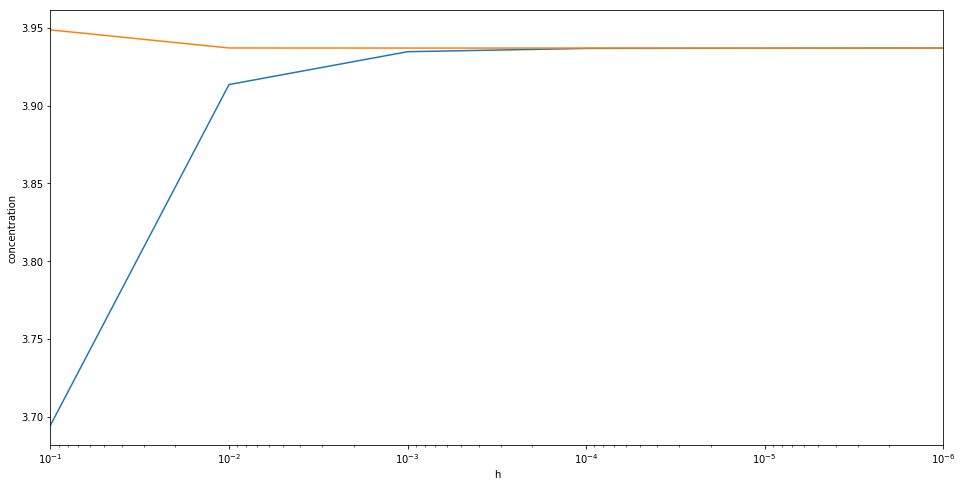

In [10]:
ab1_P = [ab1(S_0=500, E_0=200, ES_0=0, P_0=0, T=1, kf=0.001, kr=0.0001, kc=0.1, h=(10**(-i)))[3,-1] for i in range(1,7)]
ab2_P = [ab2(S_0=500, E_0=200, ES_0=0, P_0=0, T=1, kf=0.001, kr=0.0001, kc=0.1, h=(10**(-i)))[3,-1] for i in range(1,7)]

plt.axes(xscale='log')
plt.xlim(0.1,0.000001)
hs = [(10**(-i)) for i in range(1,7)]
plt.plot(hs, ab1_P)
plt.plot(hs, ab2_P)
plt.ylabel("concentration")
plt.xlabel("h")

plt.savefig("concentration_plots.png")

In [5]:
df = pd.DataFrame.from_dict({"AB1_P": ab1_P, "AB2_P":ab2_P})
df.index = [i for i in range(1,len(df) + 1)]
df.index.name = "Timestep (T)"
df["AB_diff"] = np.abs(df["AB1_P"] - df["AB2_P"])
df

,AB1_P,AB2_P,AB_diff
Timestep (T),,,
1,3.694465,3.948690,0.254225
2,3.913532,3.937055,0.023523
3,3.934663,3.937004,0.002341
4,3.936769,3.937003,0.000234
5,3.936909,3.936932,0.000023
6,3.937000,3.937003,0.000002


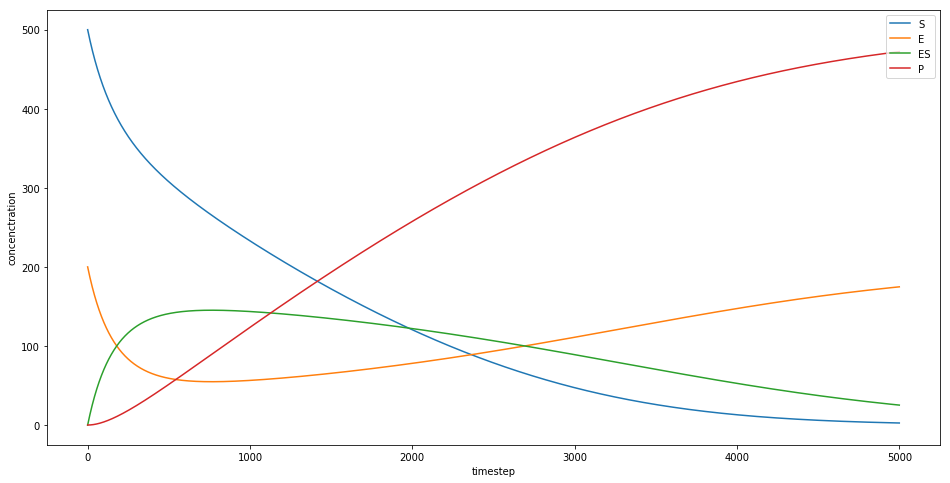

In [25]:
y = ab2(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.001, kr=0.0001, kc=0.1, h=0.01)
plot(y)
plt.savefig("change_in_concentration.png")

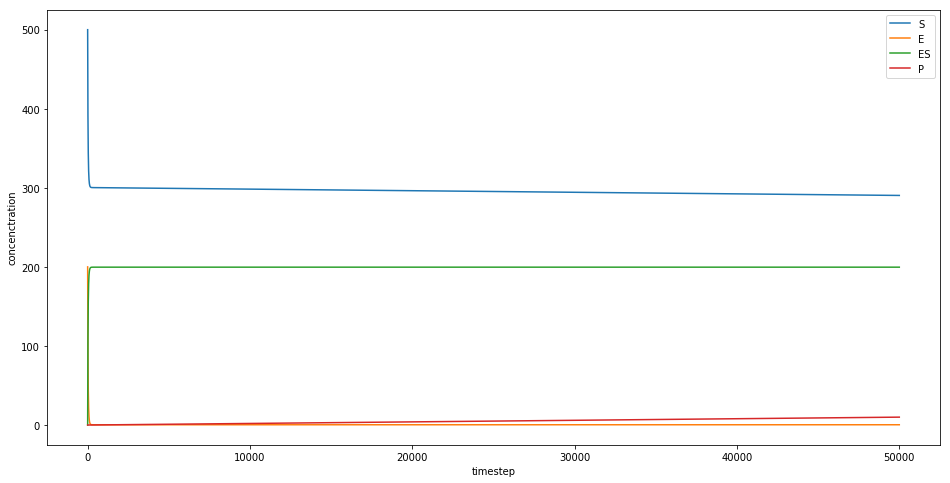

In [24]:
y = ab2(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.1, kr=0.05, kc=0.001, h=0.001)
plot(y)
plt.savefig("change_in_concentration_001.png")

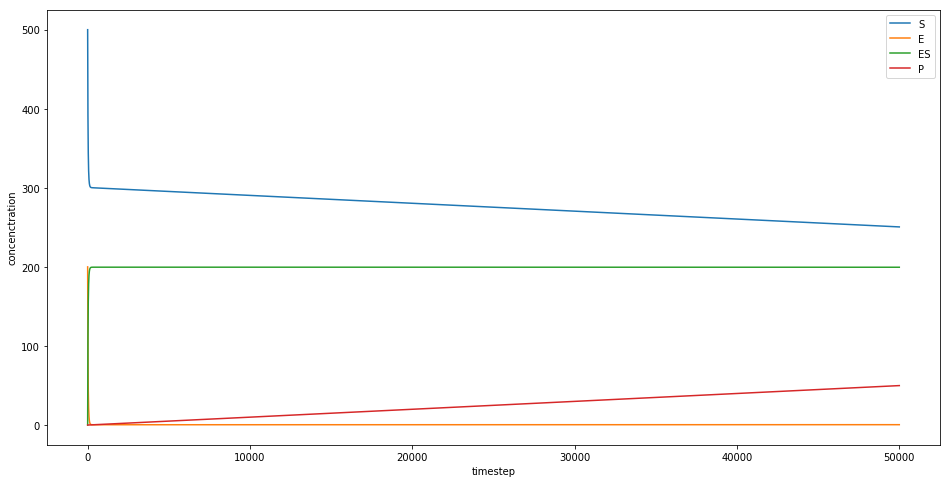

In [26]:
y = ab2(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.1, kr=0.05, kc=0.005, h=0.001)
plot(y)
plt.savefig("change_in_concentration_005.png")

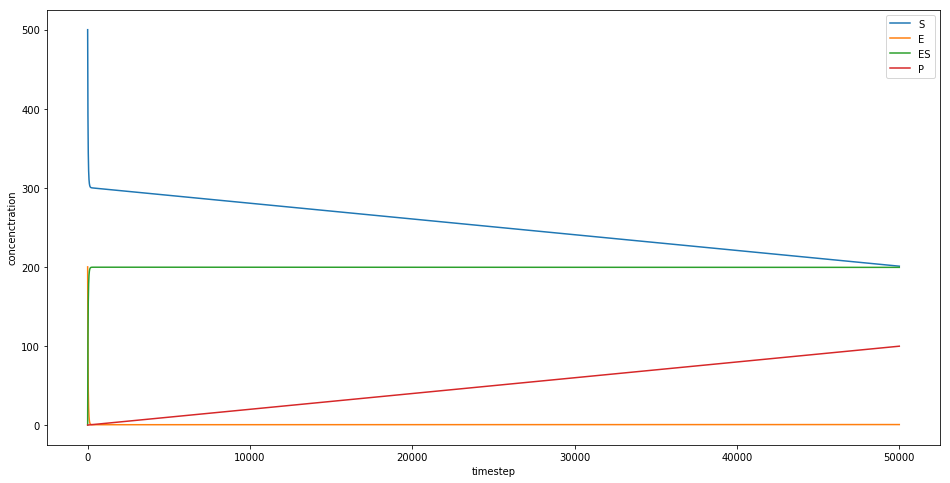

In [28]:
y = ab2(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.1, kr=0.05, kc=0.01, h=0.001)
plot(y)
plt.savefig("change_in_concentration_01.png")

In [ ]:
y = ab2(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.001, kr=0.001, kc=0.1, h=0.001)

In [33]:
def ab1_248(S_0, E_0, ES_0, P_0, kf, kr, kc, T, h):
    # number of steps to take
    n = int(T / h)
    y = np.zeros((5,n+1))
    y[0,0], y[1,0], y[2,0], y[3,0], y[4,0] = S_0, E_0, ES_0, P_0, P_0
    km = (kr + kc) / kf
    for i in range(1,n+1):
        S,E,ES,P,AP = y[0,i-1], y[1,i-1], y[2,i-1], y[3,i-1], y[4,i-1]
        y[0,i] = y[0,i-1] + h * ((-kf*E*S) + (kr*ES ))
        y[1,i] = y[1,i-1] + h * ((-kf*E*S) + ((kr + kc) * ES))
        y[2,i] = y[2,i-1] + h * ((kf *E*S) - ((kr + kc) * ES))
        y[3,i] = y[3,i-1] + h * (kc*E_0) * (S / (km + S))
        y[4,i] = y[4, i-1] + h * ((kc*E_0) * (S / (km + S)))
    return y

def ab2_248(S_0, E_0, ES_0, P_0, kf, kr, kc, T, h):
    method2 = lambda a,c,d : a + (h/2) * (3 * c - d)
    n = int(T / h)
    hE = 0.1 * h**2
    nE = int(np.ceil(h / hE))
    hE = h/nE
    
    # Use self-starting method to calculate the initial step
    yE = ab1_248(S_0, E_0, ES_0, P_0, kf, kr, kc, nE * hE, hE) 
    y = np.zeros((5, n+1))
    
    km = (kr + kc) / kf
    y[0,0], y[1,0], y[2,0], y[3,0], y[4,0] = S_0, E_0, ES_0, P_0, P_0
    y[0,1], y[1,1], y[2,1], y[3,1], y[4,1] = yE[0,-1], yE[1,-1], yE[2,-1], yE[3,-1], y[4, -1]
    for i in range(2,n+1):
        S,E,ES,P, AP = y[0,i-2], y[1,i-2], y[2,i-2], y[3,i-2],y[4, i-1]
        S1,E1,ES1,P1, AP1 = y[0,i-1], y[1,i-1], y[2,i-1], y[3,i-1], y[4,i-1]
        y[0,i] = method2(S1, ((-kf*E1*S1) + (kr*ES1 )), ((-kf*E*S) + (kr*ES )))
        y[1,i] = method2(E1, ((-kf*E1*S1) + ((kr + kc) * ES1)), ((-kf*E*S) + ((kr + kc) * ES)))
        y[2,i] = method2(ES1, ((kf *E1*S1) - ((kr + kc) * ES1)), ((kf *E*S) - ((kr + kc) * ES)))
        y[3,i] = method2(P1, (kc*ES1), (kc*ES))
        y[4,i] = method2(AP1, ((kc*E_0) * (S1 / (km + S1))), ((kc*E_0) * (S / (km + S))))
    return y        

In [37]:
y2 = ab2_248(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.001, kr=0.001, kc=0.1, h=0.001)

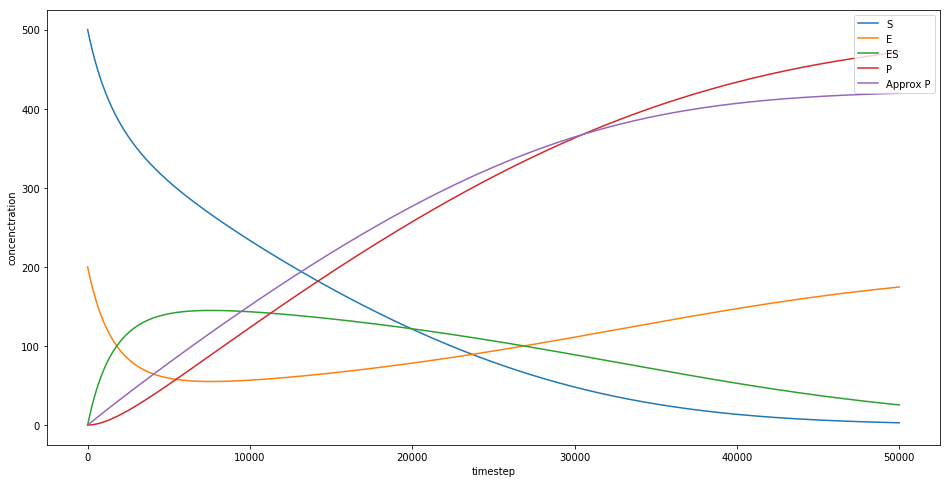

In [39]:
plot_248(y2)
plt.savefig("approx_P.png")

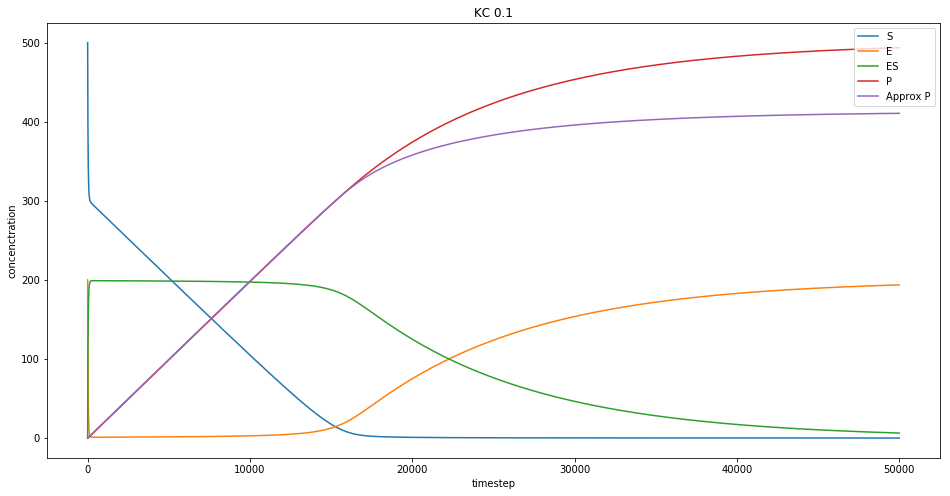

In [52]:
y = ab2_248(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.1, kr=0.05, kc=0.1, h=0.001)
plot_248(y)
plt.title("KC 0.1")
plt.savefig("vanslyke_01.png")

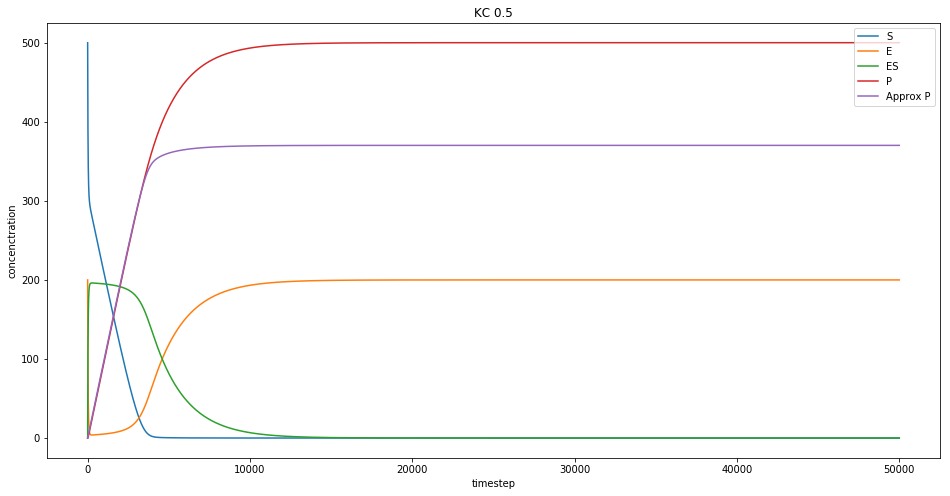

In [53]:
y = ab2_248(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.1, kr=0.05, kc=0.5, h=0.001)
plot_248(y)
plt.title("KC 0.5")
plt.savefig("vanslyke_05.png")

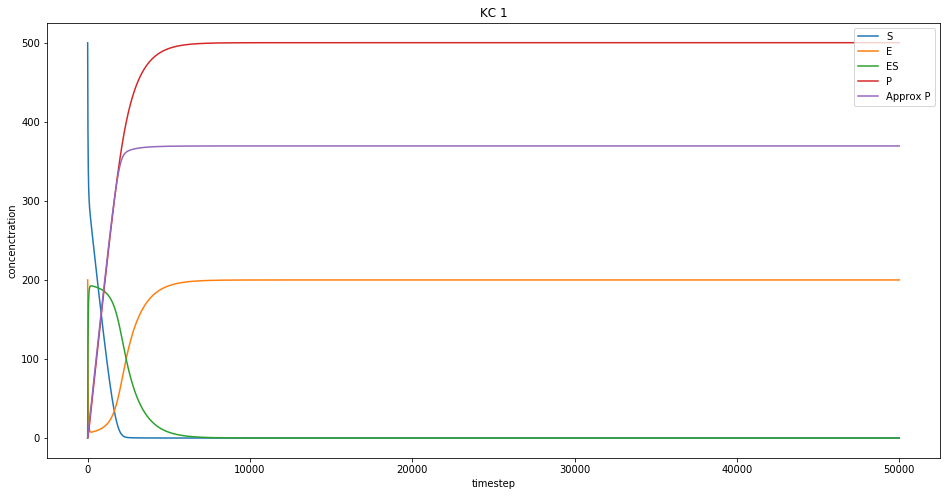

In [54]:
y = ab2_248(S_0=500, E_0=200, ES_0=0, P_0=0, T=50, kf=0.1, kr=0.05, kc=1, h=0.001)
plot_248(y)
plt.title("KC 1")
plt.savefig("vanslyke_1.png")